In [53]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
#registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.tsa.arima.model import ARIMA
import re
from pmdarima.arima import auto_arima

In [52]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.7 MB/s eta 0:00:00


In [40]:
path = '/content/drive/MyDrive/Aviator/Data1/bd_pseudo_1.csv'
data = pd.read_csv(path)

print(data.columns)

t = 0
print(len(data))
t0 = len(data)
tamanho_data = len(data)

odd = []
horario = []
odd_ajustada = []

while t <= t0:
    if t < tamanho_data:
        value = data['odd'][t]
        if isinstance(value, float):
            odd.append(np.nan)  # or any other value to represent missing data
        else:
            aux = value.split('\n\n')
            a1 = aux[0].replace(')I', '')
            a2 = a1.replace(')', '')
            a3 = a2.replace('|', '1')
            a4 = a3.replace('?', '7')
            a5 = re.sub('[^0-9.]', '', a4)
            odd.append(float(a5))
        horario.append(data['hora_criacao'][t])

    t += 1

data1 = pd.DataFrame({'odd': odd, 'apostadores': data['apostadores'], 'data_hora': horario})
data = data1
data['data_hora'] = pd.to_datetime(data['data_hora'])
data.head()

Index(['id', 'odd', 'hora_criacao', 'apostadores'], dtype='object')
25273


,odd,apostadores,data_hora
0,13.89,1650.0,2023-05-27 00:28:06
1,1.44,22211.0,2023-05-27 00:28:18
2,3.39,1751.0,2023-05-27 00:28:42
3,1.27,1950.0,2023-05-27 00:28:56
4,5.16,2086.0,2023-05-27 00:29:26


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
horario = []
date = []
for i in range(len(data)):
  #print(data['date'][i])
  dt1 = datetime.strftime(data['data_hora'][i],'%H:%M:%S')
  horario.append(dt1)
  dt2 = datetime.strftime(data['data_hora'][i],'%Y-%m-%d')
  date.append(dt2)
data['horario'] = horario
data['date'] = date
data.head()

,odd,apostadores,data_hora,horario,date
0,13.89,1650.0,2023-05-27 00:28:06,00:28:06,2023-05-27
1,1.44,22211.0,2023-05-27 00:28:18,00:28:18,2023-05-27
2,3.39,1751.0,2023-05-27 00:28:42,00:28:42,2023-05-27
3,1.27,1950.0,2023-05-27 00:28:56,00:28:56,2023-05-27
4,5.16,2086.0,2023-05-27 00:29:26,00:29:26,2023-05-27


In [42]:
i = 0
t = len(data['horario'])
#print(t)
segundo = []
minuto = []
hora = []

for j in range(0,t):
    #print(data['Hora_Aposta'][j])
    #print(data['Hora_Aposta'][j].split(":"))
    x = data['horario'][j].split(":")
    segundo.append(float(x[2]))
    minuto.append(float(x[1]))
    hora.append(int(x[0]))

data['hora'] = hora
for j in range(0,t):
    segundo[j] = segundo[j]/60
    minuto[j] = minuto[j] + round(segundo[j],6)

for j in range(0,t):
    minuto[j] = round(minuto[j]/60, 6)

data['hour_edi'] = data['hora']
for j in range(0,t):
    data['hour_edi'][j] = data['hour_edi'][j] + minuto[j]

data.head()

<ipython-input-42-363c76c6cc13>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hour_edi'][j] = data['hour_edi'][j] + minuto[j]


,odd,apostadores,data_hora,horario,date,hora,hour_edi
0,13.89,1650.0,2023-05-27 00:28:06,00:28:06,2023-05-27,0,0.468333
1,1.44,22211.0,2023-05-27 00:28:18,00:28:18,2023-05-27,0,0.471667
2,3.39,1751.0,2023-05-27 00:28:42,00:28:42,2023-05-27,0,0.478333
3,1.27,1950.0,2023-05-27 00:28:56,00:28:56,2023-05-27,0,0.482222
4,5.16,2086.0,2023-05-27 00:29:26,00:29:26,2023-05-27,0,0.490556


In [43]:
data1 = data
data1.columns = ['Odds','Qt_Apostadores','Data_Hora_Aposta','Hora_Aposta','Date_Aposta','hour','hour_edi']
data1 = data.head(2314)
data1

,Odds,Qt_Apostadores,Data_Hora_Aposta,Hora_Aposta,Date_Aposta,hour,hour_edi
0,13.89,1650.0,2023-05-27 00:28:06,00:28:06,2023-05-27,0,0.468333
1,1.44,22211.0,2023-05-27 00:28:18,00:28:18,2023-05-27,0,0.471667
2,3.39,1751.0,2023-05-27 00:28:42,00:28:42,2023-05-27,0,0.478333
3,1.27,1950.0,2023-05-27 00:28:56,00:28:56,2023-05-27,0,0.482222
4,5.16,2086.0,2023-05-27 00:29:26,00:29:26,2023-05-27,0,0.490556
...,...,...,...,...,...,...,...
2309,1.16,1219.0,2023-05-27 18:19:36,18:19:36,2023-05-27,18,18.326667
2310,12.47,1073.0,2023-05-27 18:20:16,18:20:16,2023-05-27,18,18.337778
2311,1.71,1343.0,2023-05-27 18:20:33,18:20:33,2023-05-27,18,18.342500
2312,1.53,1202.0,2023-05-27 18:20:49,18:20:49,2023-05-27,18,18.346944


In [44]:
df = pd.concat([data1['Data_Hora_Aposta'], data1['Odds']], axis = 1)

In [45]:
df.set_index('Data_Hora_Aposta', inplace=True)
df.head()

,Odds
Data_Hora_Aposta,
2023-05-27 00:28:06,13.89
2023-05-27 00:28:18,1.44
2023-05-27 00:28:42,3.39
2023-05-27 00:28:56,1.27
2023-05-27 00:29:26,5.16


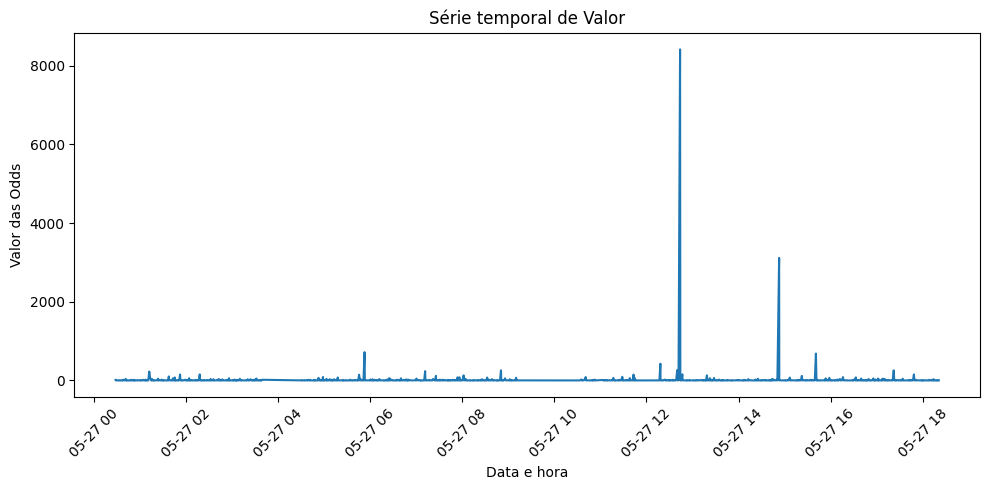

In [46]:
# Criação do gráfico
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Odds'])
plt.title('Série temporal de Valor')
plt.xlabel('Data e hora')
plt.ylabel('Valor das Odds')

# Rotação dos rótulos do eixo x para facilitar a leitura das datas
plt.xticks(rotation=45)

# Exibição do gráfico
plt.tight_layout()
plt.show()

In [47]:
decomp = seasonal_decompose(df, period = 140)
trend = decomp.trend
seasonal = decomp.seasonal
resid = decomp.resid


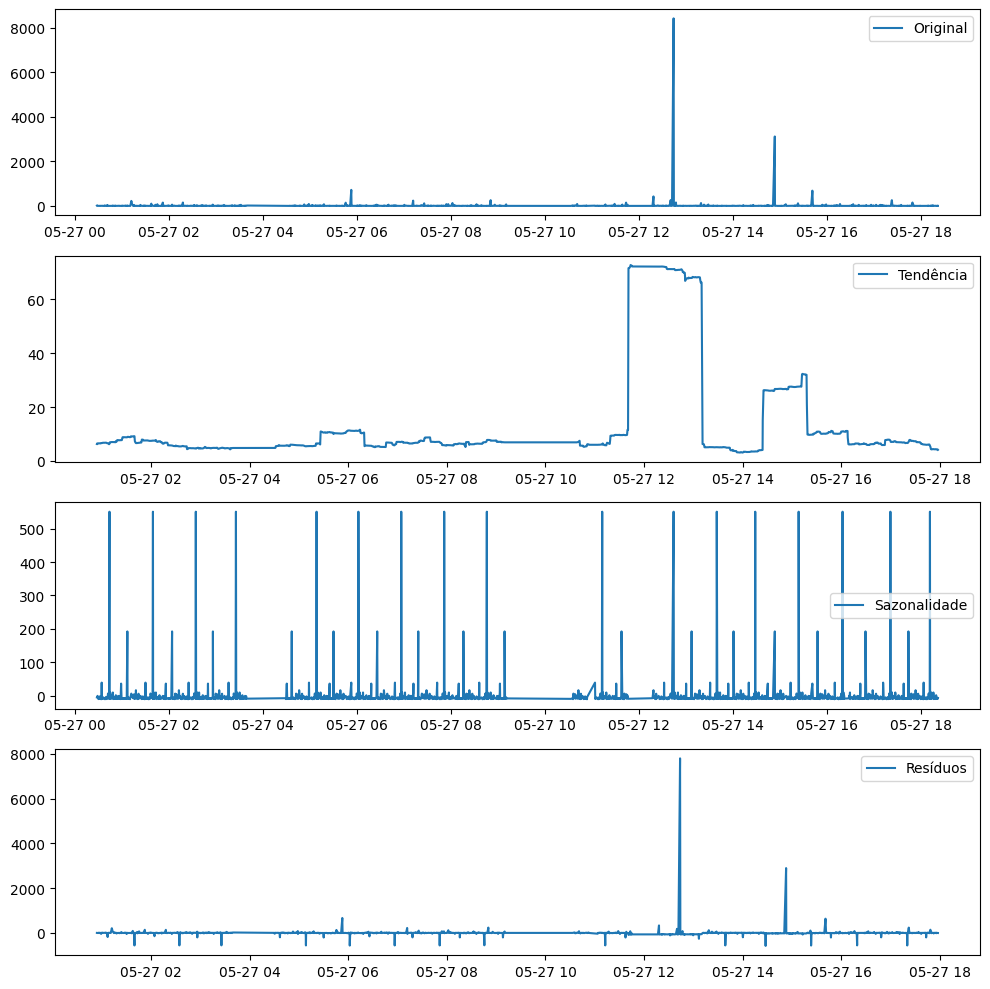

In [48]:
plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Tendência')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Sazonalidade')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(resid, label='Resíduos')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [49]:
model = ARIMA(df, order=(10,5,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=140)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

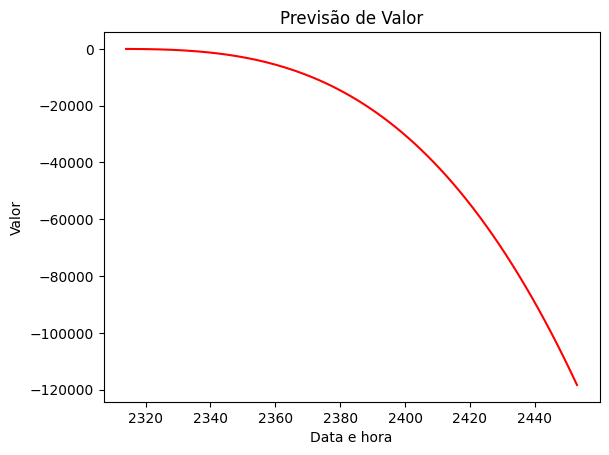

In [50]:
plt.plot(forecast, color='red')
plt.title('Previsão de Valor')
plt.xlabel('Data e hora')
plt.ylabel('Valor')
plt.show()


In [54]:
modelo_auto = auto_arima(df, seasonal = False)
modelo_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2314
Model:                        SARIMAX   Log Likelihood              -15405.287
Date:                Sat, 22 Jul 2023   AIC                          30814.573
Time:                        05:04:33   BIC                          30826.067
Sample:                             0   HQIC                         30818.762
                               - 2314                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.7214     15.261      0.768      0.442     -18.190      41.633
sigma2      3.549e+04    137.786    257.565      0.000    3.52e+04    3.58e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):         292381338.68
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):              14.44   Skew:                            40.33
Prob(H) (two-sided):                  0.00   Kurtosis:                      1742.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
proximos_12 = modelo_auto.predict(n_periods = 50)
# Visualização dos próximos 12 valores
proximos_12

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


2314    11.721396
2315    11.721396
2316    11.721396
2317    11.721396
2318    11.721396
2319    11.721396
2320    11.721396
2321    11.721396
2322    11.721396
2323    11.721396
2324    11.721396
2325    11.721396
2326    11.721396
2327    11.721396
2328    11.721396
2329    11.721396
2330    11.721396
2331    11.721396
2332    11.721396
2333    11.721396
2334    11.721396
2335    11.721396
2336    11.721396
2337    11.721396
2338    11.721396
2339    11.721396
2340    11.721396
2341    11.721396
2342    11.721396
2343    11.721396
2344    11.721396
2345    11.721396
2346    11.721396
2347    11.721396
2348    11.721396
2349    11.721396
2350    11.721396
2351    11.721396
2352    11.721396
2353    11.721396
2354    11.721396
2355    11.721396
2356    11.721396
2357    11.721396
2358    11.721396
2359    11.721396
2360    11.721396
2361    11.721396
2362    11.721396
2363    11.721396
dtype: float64

In [ ]:
data1 = data[data['Date_Aposta'] == '2023-02-13']
data2 = data[data['Date_Aposta'] == '2023-07-22']